In [1]:
#importing the neccessary libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#Importing and converting the csv file to a Pandas Dataframe for easy manipulation
df = pd.read_csv('nigeria_houses_data.csv')

# Details of the Data 
### This datasets contains Houses listings in Nigeria and their prices based on Location and other parameters.

Datashape (24326, 8)

Parameters:

- bedrooms -> number of bedrooms in the houses
- bathrooms -> number of bathrooms in the houses
- toilets -> number of toilets 
- parking_space
- title -> house type
- town -> town in which the house is located
- state -> state within Nigeria in which the house is located and finally
- price -> the target column.

In [3]:
#Displaying the first five datapoints
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [4]:
#Displaying the inofrmation on the dataset, and the summary of its numerical statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


bedrooms         0.025734
bathrooms        0.021965
toilets          0.015486
parking_space    0.018370
price            1.000000
Name: price, dtype: float64

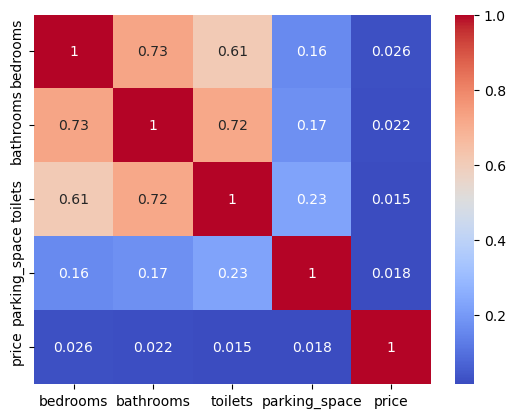

In [5]:
#Viewing the correlation between all
heatmap_df = df[['bedrooms','bathrooms','toilets','parking_space','price']].corr()
sns.heatmap(heatmap_df,cmap='coolwarm',annot=True)
df[['bedrooms','bathrooms','toilets','parking_space','price']].corr()['price']

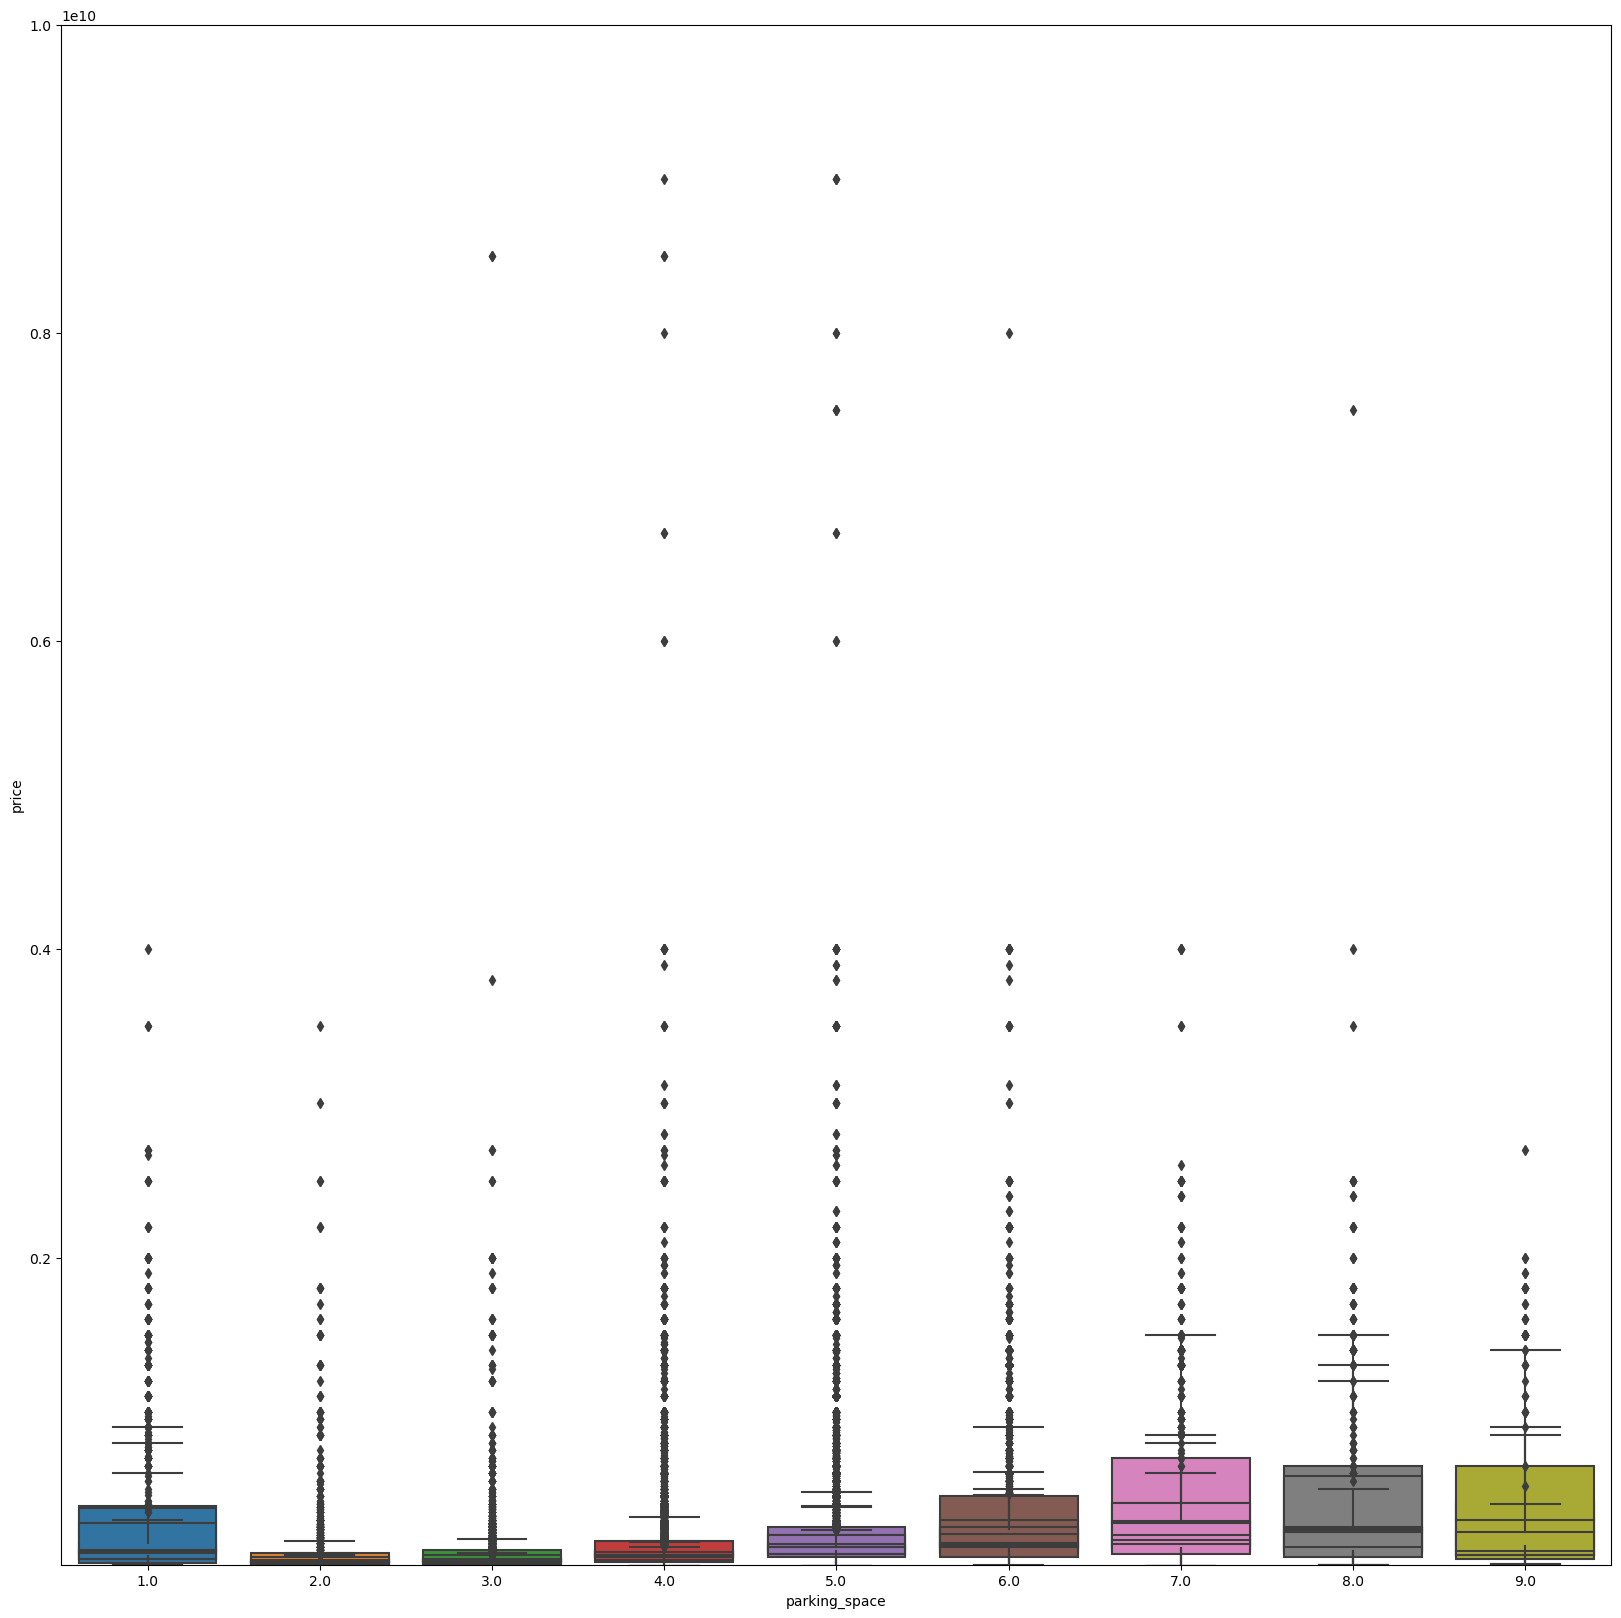

In [6]:
#Checking for outliers 
fig = plt.figure(figsize=(20,20))
for i in ['bedrooms','bathrooms','toilets','parking_space']:
    sns.boxplot(x=i, y='price',data= df)
    plt.ylim(8000000,10000000000)

In [7]:
#Removing the rows with the outliers and viewing the new correlation with the other columns and the price column
df = df[(df['price']< 150000000)&(df['price']>5000000)]
df.info()
df[['bedrooms','bathrooms','toilets','parking_space','price']].corr()['price']

<class 'pandas.core.frame.DataFrame'>
Index: 17140 entries, 2 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17140 non-null  float64
 1   bathrooms      17140 non-null  float64
 2   toilets        17140 non-null  float64
 3   parking_space  17140 non-null  float64
 4   title          17140 non-null  object 
 5   town           17140 non-null  object 
 6   state          17140 non-null  object 
 7   price          17140 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.2+ MB


bedrooms         0.495367
bathrooms        0.410496
toilets          0.491580
parking_space    0.120344
price            1.000000
Name: price, dtype: float64

In [8]:
#Encoding the title column into integers but first we find the number of unique categories and their names
print(df['title'].nunique(), df['title'].unique(), sep='\n')

7
['Detached Duplex' 'Semi Detached Duplex' 'Detached Bungalow'
 'Terraced Duplexes' 'Block of Flats' 'Semi Detached Bungalow'
 'Terraced Bungalow']


In [9]:
#Creating a column of only price and title and then grouping the data by title and the corresponding mean of the prices and 
#sorting them by the highest average price to the lowest average price
title_price_avg= df[['title','price']].groupby('title').mean().sort_values(by='price', ascending=False)
title_price_avg

,price
title,
Detached Duplex,8.893126e+07
Semi Detached Duplex,6.866615e+07
Terraced Duplexes,6.397267e+07
Block of Flats,4.343485e+07
Terraced Bungalow,3.111603e+07
Semi Detached Bungalow,2.895909e+07
Detached Bungalow,2.832724e+07


Text(0, 0.5, 'Price x10^8')

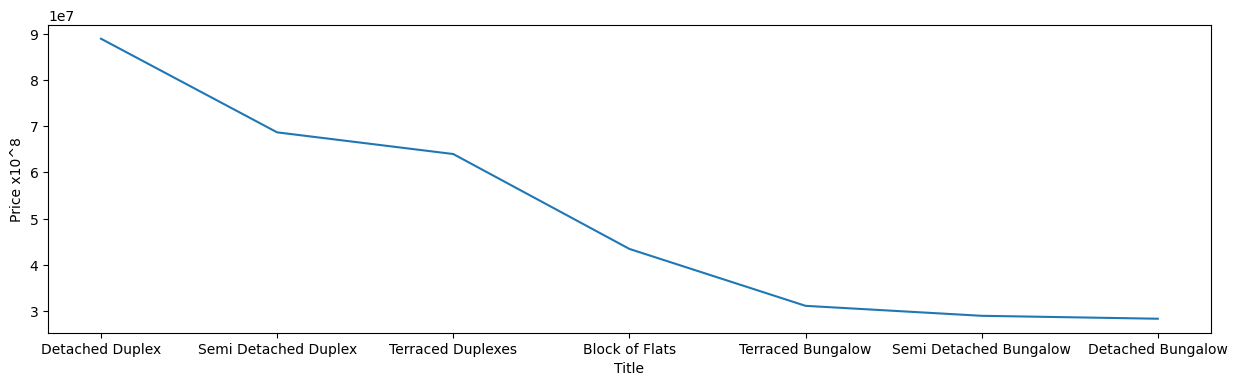

In [10]:
#Creating a plot to visualize the correlation between the price and title column
fig = plt.figure(figsize=(15,4))
plt.plot(title_price_avg)
plt.xlabel('Title')
plt.ylabel('Price x10^8')

In [11]:
'''Create a dictionary for the title column to map through and get the equivalent category 
whereby the title with the highest average price will have a higher categorical number and vice versa'''

title_cat = {'Detached Duplex': 7, 'Semi Detached Duplex': 6, 'Terraced Duplexes': 5,
             'Block of Flats': 4, 'Terraced Bungalow': 3, 'Semi Detached Bungalow': 2,
               'Detached Bungalow': 1}
df['title'] = df['title'].map(title_cat)
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,7,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,7,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,6,Lekki,Lagos,75000000.0
6,4.0,5.0,5.0,4.0,7,Lekki,Lagos,65000000.0
7,2.0,2.0,3.0,6.0,1,Epe,Lagos,12000000.0


In [12]:
#Checking how many unique states are in the dataset
print(df['state'].nunique(), df['state'].unique(), sep='\n')



25
['Lagos' 'Abuja' 'Edo' 'Ogun' 'Oyo' 'Imo' 'Rivers' 'Enugu' 'Kaduna'
 'Anambara' 'Kwara' 'Nasarawa' 'Abia' 'Delta' 'Akwa Ibom' 'Osun' 'Ekiti'
 'Cross River' 'Kogi' 'Kano' 'Katsina' 'Bayelsa' 'Borno' 'Plateau' 'Niger']


                    price
state                    
Borno        1.050000e+08
Lagos        7.536386e+07
Abuja        6.256525e+07
Abia         6.000000e+07
Rivers       5.870773e+07
Enugu        5.822161e+07
Imo          5.398810e+07
Delta        5.229091e+07
Anambara     4.657551e+07
Akwa Ibom    4.630000e+07
Ekiti        4.300000e+07
Edo          4.167742e+07
Niger        4.000000e+07
Nasarawa     3.975000e+07
Oyo          3.837517e+07
Osun         3.690000e+07
Kaduna       3.477273e+07
Kano         3.000000e+07
Kogi         2.725000e+07
Plateau      2.700000e+07
Cross River  2.500000e+07
Kwara        2.487500e+07
Ogun         2.353867e+07
Bayelsa      2.000000e+07
Katsina      1.050000e+07


Text(0, 0.5, 'Price x10^8')

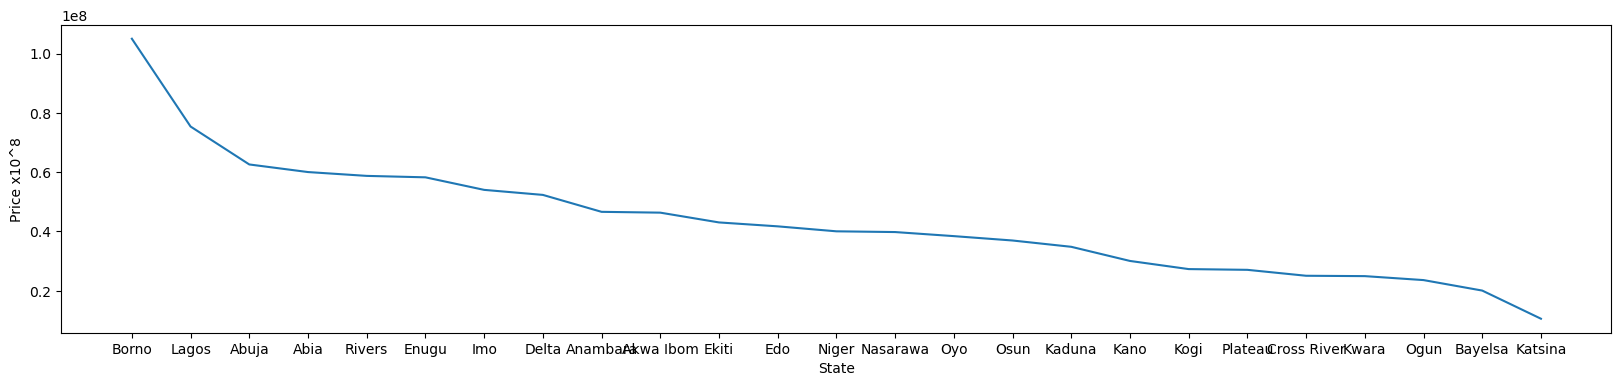

In [13]:
#Creating a column of only price and state and then grouping the data by state and the corresponding mean of the prices and 
#sorting them by the highest average price to the lowest average price
state_price_avg= df[['state','price']].groupby('state').mean().sort_values(by='price', ascending=False)
print(state_price_avg)

#Creating a plot to visualize the correlation between the average price and state column
fig = plt.figure(figsize=(20,4))
plt.plot(state_price_avg)
plt.xlabel('State')
plt.ylabel('Price x10^8')

In [16]:
'''Create a dictionary for the state column to map through and get the equivalent category 
whereby the state with the highest average price will have a higher categorical number and vice versa'''

state_cat = {'Borno':25, 'Lagos':24, 'Abuja':23, 'Abia':22, 'Rivers':21, 'Enugu':20, 'Imo':19, 'Delta':18,
               'Anambara':17, 'Akwa Ibom':16, 'Ekiti':15, 'Edo':14, 'Niger':13, 'Nasarawa':12, 'Oyo':11,
                'Osun':10, 'Kaduna':9, 'Kano':8, 'Kogi':7, 'Plateau':6, 'Cross River':5, 'Kwara':4,
               'Ogun':3, 'Bayelsa':2, 'Katsina':1}

df['state'] = df['state'].map(state_cat)
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4.0,5.0,5.0,4.0,7,Lekki,24,120000000.0
3,4.0,4.0,5.0,6.0,7,Ajah,24,40000000.0
4,4.0,4.0,5.0,2.0,6,Lekki,24,75000000.0
6,4.0,5.0,5.0,4.0,7,Lekki,24,65000000.0
7,2.0,2.0,3.0,6.0,1,Epe,24,12000000.0


In [17]:
#Deleting/Dropping the town column because of redundancy 
df.drop('town', axis=1, inplace=True)
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,state,price
2,4.0,5.0,5.0,4.0,7,24,120000000.0
3,4.0,4.0,5.0,6.0,7,24,40000000.0
4,4.0,4.0,5.0,2.0,6,24,75000000.0
6,4.0,5.0,5.0,4.0,7,24,65000000.0
7,2.0,2.0,3.0,6.0,1,24,12000000.0


In [18]:
#Checking the correlation between all the columns and the price column
df[['bedrooms','bathrooms','toilets','parking_space','price','title','state']].corr()['price']

bedrooms         0.495367
bathrooms        0.410496
toilets          0.491580
parking_space    0.120344
price            1.000000
title            0.601481
state            0.325714
Name: price, dtype: float64

In [19]:
#Splitting the dataframe to its features and label and then splitting it to training and test datasets
#Dropping the columns with low correlation with the price column
X = df.drop(['price','parking_space','state'], axis=1)
y = df['price']

#importing scikit-learn to split the data, test set is 20% of the dataset and train set is 80%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [20]:
#Importing the linear regression model and creating its object
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [21]:
#Training the model with the training dataset, Printing the intercepts, coefficient and 
lm.fit(X_train, y_train)
print(lm.intercept_)

#displaying the coefficient on a table
cdf = pd.DataFrame(lm.coef_,index= X.columns,columns=['Coefficient'])
cdf

-22859859.440832436


,Coefficient
bedrooms,6.192759e+06
bathrooms,-1.495311e+06
toilets,6.391107e+06
title,7.701563e+06


In [22]:
#Making predictions on the test dataset
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions x10^8')

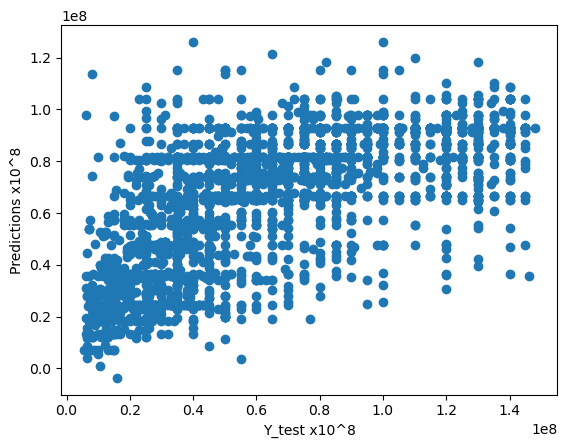

In [26]:
#Creating a scatter plot with a regression line to better visualize how well we fitted the data
reg = pd.DataFrame(predictions, y_test, columns=['y_test']).reset_index()
reg.rename(columns ={'price': 'Predictions'}, inplace= True)
plt.scatter(y_test, predictions)
plt.xlabel('Y_test x10^8')
plt.ylabel('Predictions x10^8')

In [27]:
'''Calculating the Root Mean Squared Error, Mean Squared Error and Variance Score of the predictions compared to the actual
value'''
from sklearn import metrics
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test,predictions))}', 
          f'Mean Squared Error: {metrics.mean_squared_error(y_test,predictions)}',
          f'Variance Score: {metrics.explained_variance_score(y_test, predictions)}',
         sep='\n')


Root Mean Squared Error: 27062846.1302722
Mean Squared Error: 732397640670789.0
Variance Score: 0.440614580089959
